**INTRODUCTION**

The International Energy Agency (https://www.iea.org/) has announced that the world is in the middle of a global energy crisis of unprecedented depth and complexity.Taking an all-fuels, all-technology approach, the IEA recommends policies that enhance the reliability, affordability and sustainability of energy.

According to the UN environment programme report: '2020 GLOBAL STATUS REPORT FOR BUILDINGS AND CONSTRUCTION', the residential buildings occupy 22% in energy consumption and 17% in emission in global share of buildings and construction final energy and emissions, 2019. Reference: https://wedocs.unep.org/bitstream/handle/20.500.11822/34572/GSR_ES.pdf


Obviously, it has a very huge impact to climate change especially in populous developing countries such as India, where the construction Industry is expected to reach $1.4 Tn by 2025. Clearly how we can manage and control sustainable construction is very important.

Predicting heating and cooling loads of a building in the initial phase of the design to find out optimal solutions amongst different designs is very important, as well as in the operating phase after the building has been finished for efficient energy. 

In our energy efficient building solution, we apply diferent supervised learning models for predicting heating and cooling loads of a building based on a dataset for building energy performance.

The model was trained and validated on 33% on the data set, and the accuracy for the prediction test was 99.9% and 99.6% respectively.

**OBJECTIVE : Investigate the energy efficieny performance of a building using different machine learning algorithms that predict Heating and Cooling loads of a building so that the architects can generate sustainable and climate friendly designs with improved energy and emission footprint**

**DATASET**

We used the Energy efficiency Data Set available at UC Irvine, California repository https://archive.ics.uci.edu/ml/datasets/energy+efficiency



The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK). This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

DataSet Information:

Based on energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
* Relative Compactness
* Surface Area - m²
* Wall Area - m²
* Roof Area - m²
* Overall Height - m
* Orientation - 2:North, 3:East, 4:South, 5:West
* Glazing Area - 0%, 10%, 25%, 40% (of floor area)
* Glazing Area Distribution (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West
* Heating Load - kWh
* Cooling Load - kWh

We have figured that the Wall Area, Roof Area, Glazing Area are the key indicators and can influence the energy load efficiency for both (Heating and Cooling).

**Importing the necessary modules and packages**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**DATA EXPLORATION AND VISUALIZATION**

We load the dataset and carry out Exploratory Data Analysis (EDA)

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/building_energy_dataset/Building Energy Efficiency.csv")

In [ ]:
data.head(10)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.9000,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.9000,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.9000,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.8600,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.8600,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


We can see that dataset has 10 features and total 768 records. We can see from the summary above that there are no missing values in our dataset, so we do not need to carry out any missing value imputation.

**Exploratory Data Analysis**

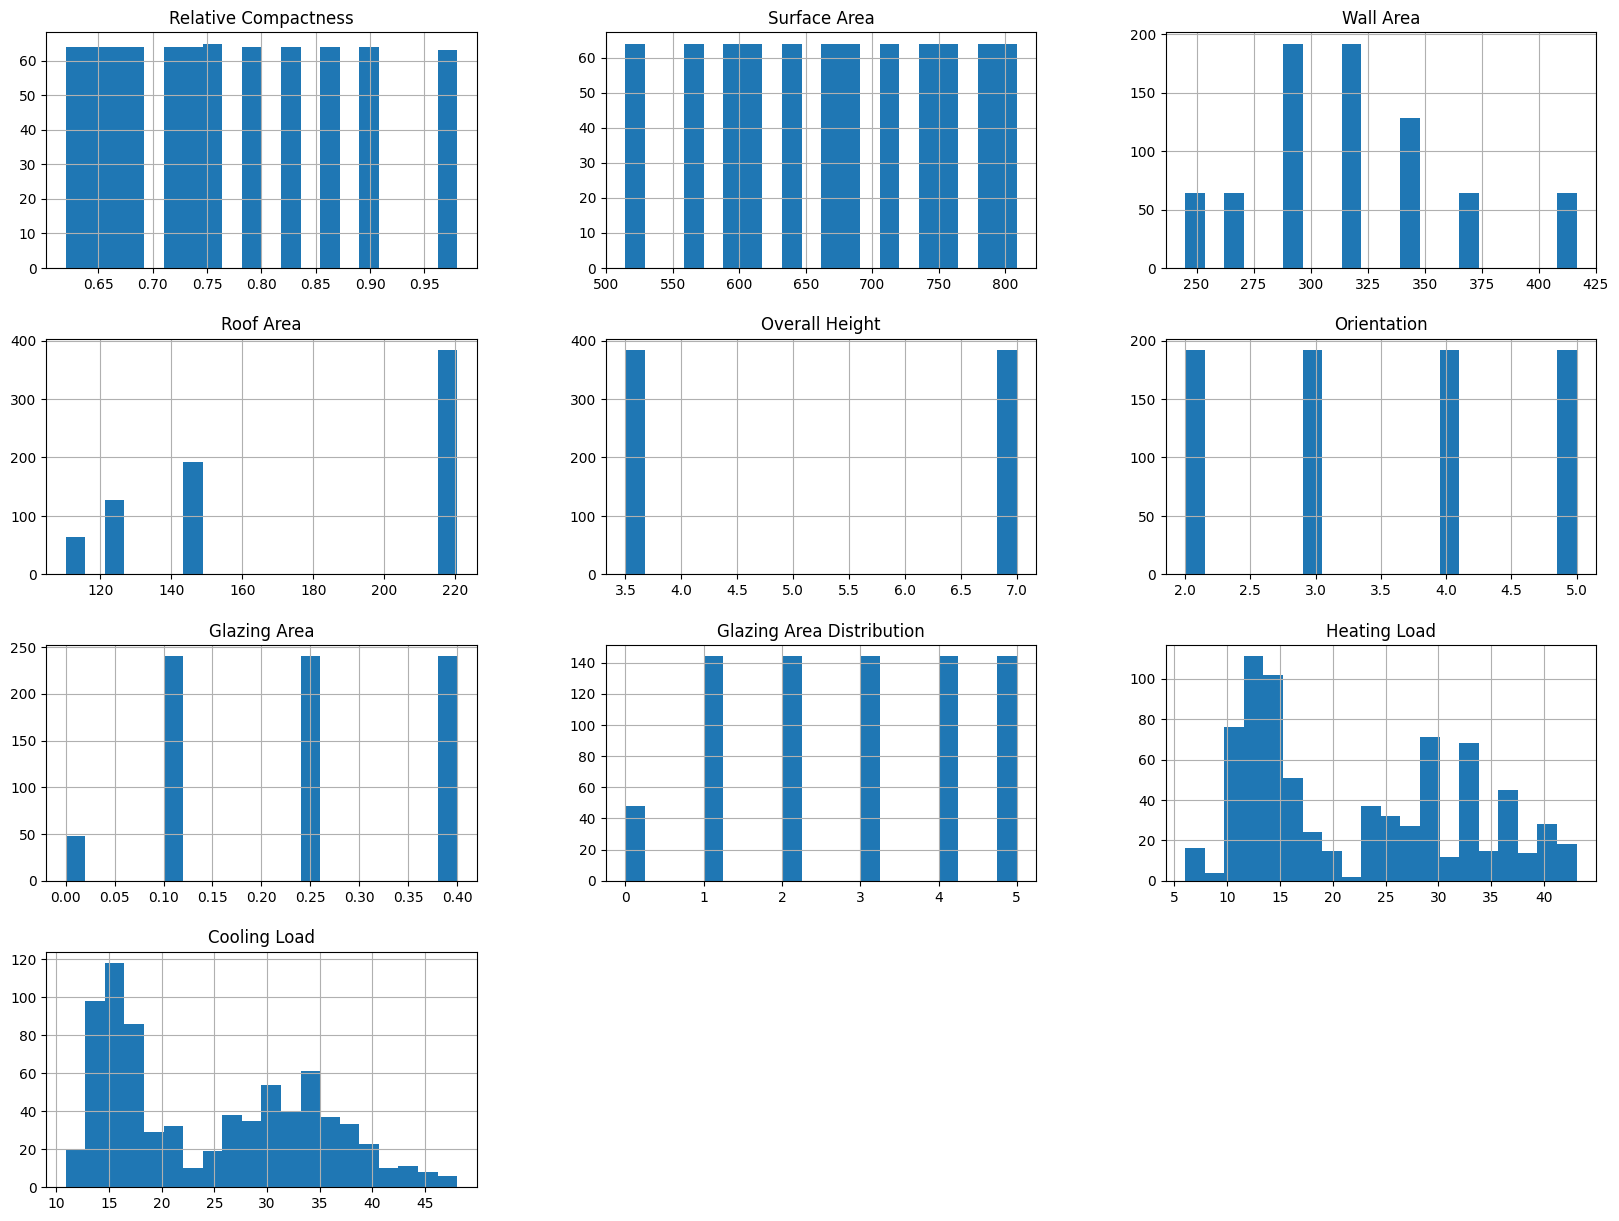

In [ ]:
# Plotting histograms for the building features to check for data distribution
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(20,15))
plt.show()

**Checking for correlation between the dependent variables/features and independent variables**

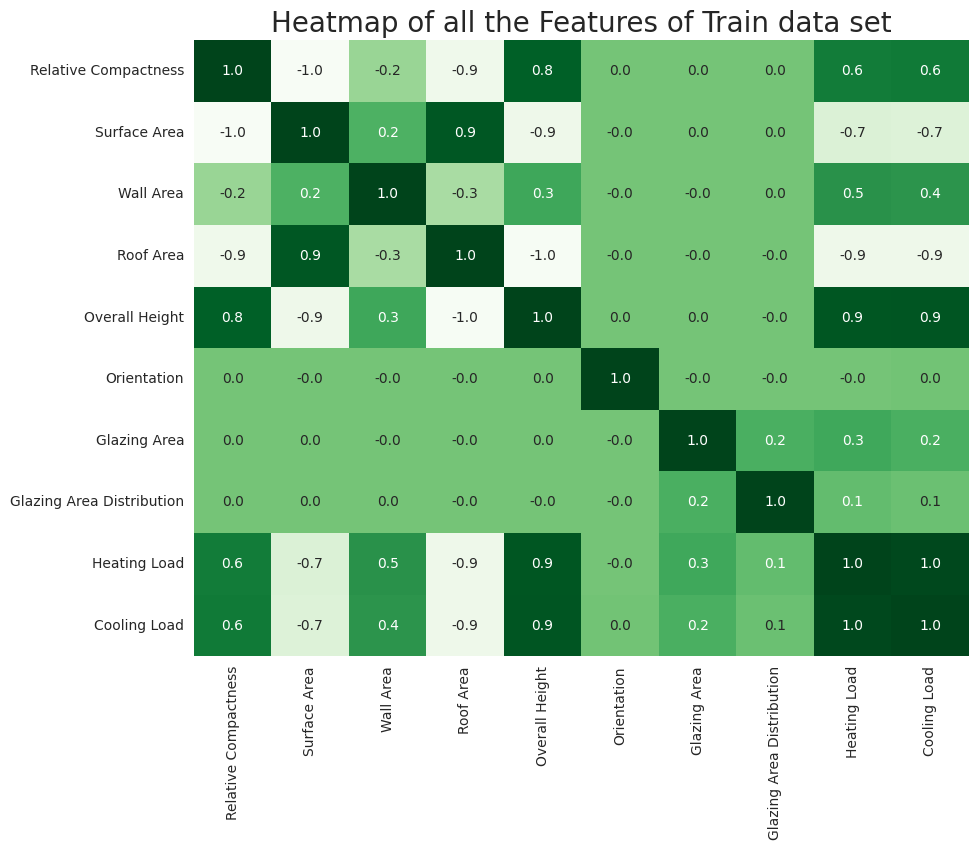

In [ ]:
import matplotlib.style as style
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot=True, cbar=False, cmap='Greens', fmt='.1f')
plt.title("Heatmap of all the Features of Train data set", fontsize = 20);

We decide not to remove any of the features from our dataset and use all the parameters in the building dataset to train our EEBD model.

**BUILDING THE MACHINE LEARNING MODEL FOR OUR ENERGY EFFICIENT BUILDING DESIGN**

**We used SCIKIT-LEARN library to investigate different SUPERVISED ML algorithms to predict Heating and Cooling loads for building designs• 

We tried to learn how to tune different parameters in the models and obtained a very good prediction result (>99.5% on both Heating and Cooling loads, compared to the experimental data set). Some observations will be shown in the graphs bellow.

In [ ]:
import sklearn
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import randint as sp_randint
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

**Defining the Dependent variables(X) and the target or dependent variables (Y)**

In [ ]:
X = data[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
Y = data[['Heating Load', 'Cooling Load']]
Y1= data[['Heating Load']]
Y2= data[['Cooling Load']]

**Splitting the dataset into train and test using the SK Learn train_test_split method. 33% of data is reserved for test and remaining 67% to train our model**

We also scale our data to bring the values within the [0,1] range using min max scaler function.

In [ ]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.33, random_state = 20)

MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

Now we create a dataframe to store the computation results of the different models

In [ ]:
model_result=[]
model_result = pd.DataFrame(index=None, columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

In [ ]:
regressors = [['SVR',SVR()],
              
              ['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['KNeighborsRegressor', KNeighborsRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()]]

In [ ]:
for model in regressors:
    name = model[0]
    model = model[1]
    
    model.fit(X_train,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train))
    acte1 = r2_score(y1_test, model.predict(X_test))
    
    model.fit(X_train,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train))
    acte2 = r2_score(y2_test, model.predict(X_test))
    
    model_result = model_result.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
model_result.sort_values(by='test_Cooling')

,model,train_Heating,test_Heating,train_Cooling,test_Cooling
4,MLPRegressor,0.877968,0.883349,0.831537,0.855015
0,SVR,0.930662,0.910593,0.892578,0.887385
2,KNeighborsRegressor,0.945989,0.904490,0.926869,0.888896
5,AdaBoostRegressor,0.965845,0.961849,0.947663,0.944770
1,DecisionTreeRegressor,1.000000,0.995159,1.000000,0.948692
3,RandomForestRegressor,0.999509,0.997263,0.995480,0.964348
6,GradientBoostingRegressor,0.998173,0.997641,0.979423,0.976044


Inference: We observe best performance across test_cooling and test_heating dataset using the Gradient Boosted Regressor so we select this as our best model. Below we try to improve the accuracy of our model using hyperparameter tuning.

 
**GRADIENT BOOSTED REGRESSOR MODEL-TUNING**


Boosting machine learning algorithms are highly used because they give better accuracy over simple ones. Performance of these algorithms depends on hyperparameters. An optimal set of parameters can help to achieve higher accuracy. Finding hyperparameters manually is tedious and computationally expensive. Therefore, automation of hyperparameters tuning is important. RandomSearch, GridSearchCV, and Bayesian optimization are generally used to optimize hyperparameters.

In this Notebook, we calculate the best parameters for the model using “GridSearchCV”.

What we will do now is make an instance of the GradientBoostingRegressor. We will create our grid with the various values for the hyperparameters. We will then take this grid and place it inside GridSearchCV function so that we can prepare to run our model. There are some arguments that need to be set inside the GridSearchCV function such as estimator, grid, cv, etc.

With this tuning we can see that the mean squared error is lower than with the baseline model. We can now move to the final step of taking these hyperparameter settings and see how they do on the dataset. There are several hyperparameters we need to tune, and they are as follows:

+ Learning rate: The learning rate is the weight that each tree has on the final prediction.
+ Number of estimators: The number of estimators is show many trees to create. The more trees the more likely to overfit.
+ Min samples split: The minimum number of samples required to split an internal node
+ Max depth: Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
+ Subsample: Subsample is the proportion of the sample to use.

In [ ]:
param_grid = [{"learning_rate": [0.01, 0.02, 0.1], "n_estimators":[150, 200, 250], "max_depth": [4, 5, 6], 
 "min_samples_split":[1, 2, 3], "min_samples_leaf":[2, 3], "subsample":[1.0, 2.0]}]

GBR = GradientBoostingRegressor()
grid_search_GBR = GridSearchCV(GBR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_GBR.fit(X_train, y2_train)

print("R-Squared::{}".format(grid_search_GBR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_GBR.best_params_))

R-Squared::-1.0507988779570483
Best Hyperparameters::
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 250, 'subsample': 1.0}


In [ ]:
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=2, min_samples_leaf=3, subsample=1.0)

GBR.fit(X_train,y1_train)
print("R-Squared on Y1test dataset={}".format(GBR.score(X_test,y1_test)))

GBR.fit(X_train,y2_train)   
print("R-Squaredon Y2test dataset={}".format(GBR.score(X_test,y2_test)))

R-Squared on Y1test dataset=0.9985526641111989
R-Squaredon Y2test dataset=0.9919491833306666


**Find the Best Model**

In [ ]:
Acc1 = pd.DataFrame(index=None, columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

In [ ]:
regressors1 =[['GradientBoostingRegressor',GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=2, min_samples_leaf=3, subsample=1.0)]]

In [ ]:
for mod in regressors1:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train))
    acte1 = r2_score(y1_test, model.predict(X_test))
    
    model.fit(X_train,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train))
    acte2 = r2_score(y2_test, model.predict(X_test))
    
    Acc1 = Acc1.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
Acc1.sort_values(by='test_Cooling')

,model,train_Heating,test_Heating,train_Cooling,test_Cooling
0,GradientBoostingRegressor,0.999735,0.998554,0.998988,0.991927


In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=2, min_samples_leaf=3, subsample=1.0)

model.fit(X_train,y1_train)
actr1 = r2_score(y1_train, model.predict(X_train))
acte1 = r2_score(y1_test, model.predict(X_test))
y1_pred = model.predict(X_test)

model.fit(X_train,y2_train)
actr2 = r2_score(y2_train, model.predict(X_train))
acte2 = r2_score(y2_test, model.predict(X_test))
y2_pred = model.predict(X_test)

In [ ]:
print("GradientBoostRegressor: R-Squared on train dataset={}".format(actr1))
print("GradientBoostRegressor: R-Squared on Y1test dataset={}".format(acte1))
print("GradientBoostRegressor: R-Squared on train dataset={}".format(actr2))
print("GradientBoostRegressor: R-Squared on Y2test dataset={}".format(acte2))

GradientBoostRegressor: R-Squared on train dataset=0.999735396058945
GradientBoostRegressor: R-Squared on Y1test dataset=0.9985537960777339
GradientBoostRegressor: R-Squared on train dataset=0.9989884199862638
GradientBoostRegressor: R-Squared on Y2test dataset=0.991919670546593


INFERENCE: We observe that using the BEST hyperparameters the accuracy of our model improved significantly from 97.6% to 99.19% Y2 test data.


**MODEL PREDICTION OF COOLING LOAD AND HEATING LOAD USING OUR EEBD MODEL**

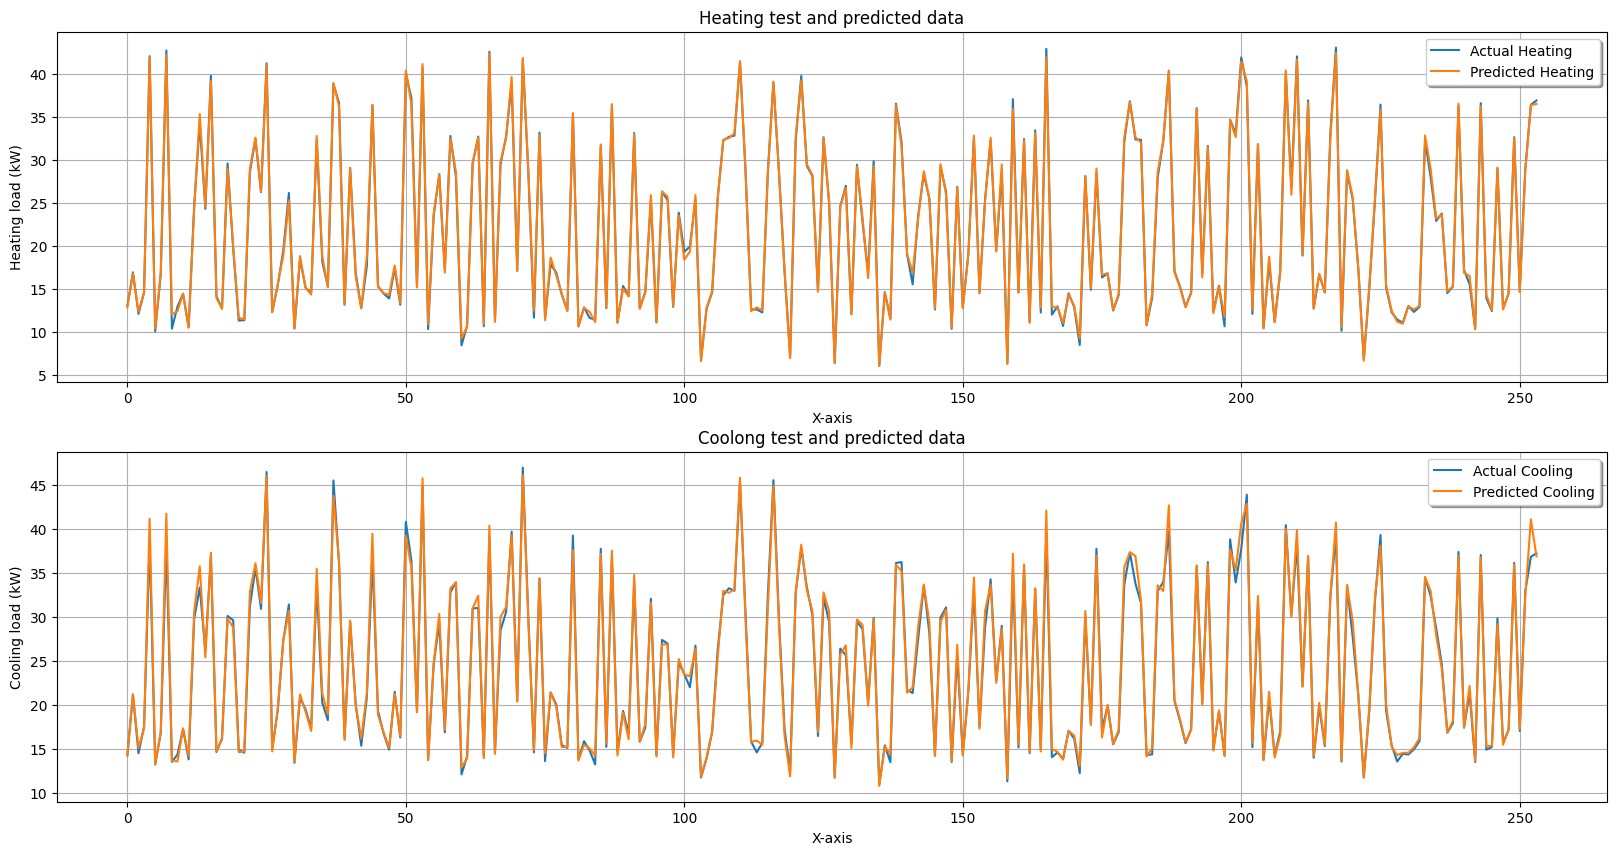

In [ ]:

# HEATING LOAD PREDICTION
x_ax = range(len(y1_test))
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(x_ax, y1_test, label="Actual Heating")
plt.plot(x_ax, y1_pred, label="Predicted Heating")
plt.title("Heating test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Heating load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

# COOLING LOAD PREDICTION

plt.subplot(2,1,2)
plt.plot(x_ax, y2_test, label="Actual Cooling")
plt.plot(x_ax, y2_pred, label="Predicted Cooling")
plt.title("Coolong test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Cooling load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**CONCLUSION**

In this project we demonstrate how machine learning can be used to optimize the energy efficiency of the building designs. Our model is able to generate the prediction of the heating and cooling load(KW) of any building design with the  building parameters similar to our train data. Our model can be a simple and cost effective tool to conbat the energy crisis of the present times. 

Thank you the opportunity to present our solution!

Team TechStorm

Ashira Sandhu, Ravneet Randhawa , Reva Chaudhary

Strawberry Fields High School, Chandigarh

**References & Citations**


1.   A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012

2.   'Modeling Energy Efficiency: Residential Building' (https://www.kaggle.com/code/winternguyen/modeling-energy-efficiency-residential-building/notebook) by Dr.Huynh Dong Nguyen
